In [1]:
import torch
import matplotlib.pyplot as plt 

# Load data

In [25]:
words = open('names.txt', 'r').read().splitlines()

In [26]:
N = len(words)
print(f'Number of words: {N}')

Number of words: 32033


In [27]:
# find max len of dataset
max(len(word) for word in words)

15

In [28]:
# find min len of dataset
min(len(word) for word in words)

2

# Exercise 1:
Train a trigram language model, i.e. take two characters as an input to predict the 3rd one.\
Feel free to use either counting or a neural net.\
Evaluate the loss;\
Did it improve over a bigram model?

## Build data dict trigram language model

In [74]:
b = {}

for w in words:
  chars= '.' + w + '.'    
  for i in range(len(chars) - 2):
    bigram = (chars[i: i + 2], chars[i + 2])
    b[bigram] = b.get(bigram, 0) + 1
b

{('.e', 'm'): 288,
 ('em', 'm'): 100,
 ('mm', 'a'): 72,
 ('ma', '.'): 174,
 ('.o', 'l'): 104,
 ('ol', 'i'): 69,
 ('li', 'v'): 54,
 ('iv', 'i'): 78,
 ('vi', 'a'): 147,
 ('ia', '.'): 903,
 ('.a', 'v'): 243,
 ('av', 'a'): 161,
 ('va', '.'): 93,
 ('.i', 's'): 124,
 ('is', 'a'): 142,
 ('sa', 'b'): 76,
 ('ab', 'e'): 173,
 ('be', 'l'): 201,
 ('el', 'l'): 822,
 ('ll', 'a'): 337,
 ('la', '.'): 684,
 ('.s', 'o'): 152,
 ('so', 'p'): 21,
 ('op', 'h'): 37,
 ('ph', 'i'): 61,
 ('hi', 'a'): 81,
 ('.c', 'h'): 352,
 ('ch', 'a'): 236,
 ('ha', 'r'): 329,
 ('ar', 'l'): 287,
 ('rl', 'o'): 44,
 ('lo', 't'): 14,
 ('ot', 't'): 34,
 ('tt', 'e'): 121,
 ('te', '.'): 175,
 ('.m', 'i'): 393,
 ('mi', 'a'): 95,
 ('.a', 'm'): 384,
 ('am', 'e'): 226,
 ('me', 'l'): 188,
 ('el', 'i'): 537,
 ('li', 'a'): 518,
 ('.h', 'a'): 505,
 ('ar', 'p'): 8,
 ('rp', 'e'): 5,
 ('pe', 'r'): 77,
 ('er', '.'): 683,
 ('.e', 'v'): 154,
 ('ev', 'e'): 142,
 ('ve', 'l'): 76,
 ('el', 'y'): 353,
 ('ly', 'n'): 976,
 ('yn', '.'): 953,
 ('.a', 'b'):

In [75]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('ah', '.'), 1714),
 (('na', '.'), 1673),
 (('an', '.'), 1509),
 (('on', '.'), 1503),
 (('.m', 'a'), 1453),
 (('.j', 'a'), 1255),
 (('.k', 'a'), 1254),
 (('en', '.'), 1217),
 (('ly', 'n'), 976),
 (('yn', '.'), 953),
 (('ar', 'i'), 950),
 (('ia', '.'), 903),
 (('ie', '.'), 858),
 (('an', 'n'), 825),
 (('el', 'l'), 822),
 (('an', 'a'), 804),
 (('ia', 'n'), 790),
 (('ma', 'r'), 776),
 (('in', '.'), 766),
 (('el', '.'), 727),
 (('ya', '.'), 716),
 (('an', 'i'), 703),
 (('.d', 'a'), 700),
 (('la', '.'), 684),
 (('er', '.'), 683),
 (('iy', 'a'), 669),
 (('la', 'n'), 647),
 (('.b', 'r'), 646),
 (('nn', 'a'), 633),
 (('.a', 'l'), 632),
 (('.c', 'a'), 628),
 (('ra', '.'), 627),
 (('ni', '.'), 625),
 (('.a', 'n'), 623),
 (('nn', '.'), 619),
 (('ne', '.'), 607),
 (('ee', '.'), 605),
 (('ey', '.'), 602),
 (('.k', 'e'), 601),
 (('al', 'e'), 601),
 (('.s', 'a'), 595),
 (('al', 'i'), 575),
 (('sh', 'a'), 562),
 (('el', 'i'), 537),
 (('.d', 'e'), 524),
 (('li', 'a'), 518),
 (('le', 'e'), 517),
 (('y

In [76]:
N = torch.zeros((27 * 27, 27), dtype=torch.int32)

### encode - decode for char (output)

In [77]:
chars = sorted(list(set(''.join(words)))) + ['.']
char_to_idx = {s:i+1 for i,s in enumerate(chars)}
idx_to_char = {i:s for s,i in char_to_idx.items()}

In [78]:
print(chars)
print(char_to_idx)
print()
print(idx_to_char)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '.']
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 27}

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 27: '.'}


### encode - decode for word (input)

In [79]:
count = 1
word_to_idx = {}

for c1 in chars:
    for c2 in chars:
        word_to_idx[c1 + c2] = count
        count += 1

idx_to_word = {i:s for s,i in word_to_idx.items()}

In [80]:
print(word_to_idx)
print(idx_to_word)

{'aa': 1, 'ab': 2, 'ac': 3, 'ad': 4, 'ae': 5, 'af': 6, 'ag': 7, 'ah': 8, 'ai': 9, 'aj': 10, 'ak': 11, 'al': 12, 'am': 13, 'an': 14, 'ao': 15, 'ap': 16, 'aq': 17, 'ar': 18, 'as': 19, 'at': 20, 'au': 21, 'av': 22, 'aw': 23, 'ax': 24, 'ay': 25, 'az': 26, 'a.': 27, 'ba': 28, 'bb': 29, 'bc': 30, 'bd': 31, 'be': 32, 'bf': 33, 'bg': 34, 'bh': 35, 'bi': 36, 'bj': 37, 'bk': 38, 'bl': 39, 'bm': 40, 'bn': 41, 'bo': 42, 'bp': 43, 'bq': 44, 'br': 45, 'bs': 46, 'bt': 47, 'bu': 48, 'bv': 49, 'bw': 50, 'bx': 51, 'by': 52, 'bz': 53, 'b.': 54, 'ca': 55, 'cb': 56, 'cc': 57, 'cd': 58, 'ce': 59, 'cf': 60, 'cg': 61, 'ch': 62, 'ci': 63, 'cj': 64, 'ck': 65, 'cl': 66, 'cm': 67, 'cn': 68, 'co': 69, 'cp': 70, 'cq': 71, 'cr': 72, 'cs': 73, 'ct': 74, 'cu': 75, 'cv': 76, 'cw': 77, 'cx': 78, 'cy': 79, 'cz': 80, 'c.': 81, 'da': 82, 'db': 83, 'dc': 84, 'dd': 85, 'de': 86, 'df': 87, 'dg': 88, 'dh': 89, 'di': 90, 'dj': 91, 'dk': 92, 'dl': 93, 'dm': 94, 'dn': 95, 'do': 96, 'dp': 97, 'dq': 98, 'dr': 99, 'ds': 100, 'dt': 1

In [81]:
for (input, output), c in b.items():
    N[word_to_idx[input] - 1, char_to_idx[output] - 1] = c

In [82]:
print(N)

tensor([[  0,   5,   5,  ...,  20,  11,  40],
        [ 28,  20,   1,  ...,  12,   0,  36],
        [ 38,   0,   8,  ...,  23,   0,  11],
        ...,
        [246,   0,   0,  ...,   0,   2,   0],
        [456,   0,   0,  ...,  91,   1,   0],
        [  0,   0,   0,  ...,   0,   0,   0]], dtype=torch.int32)


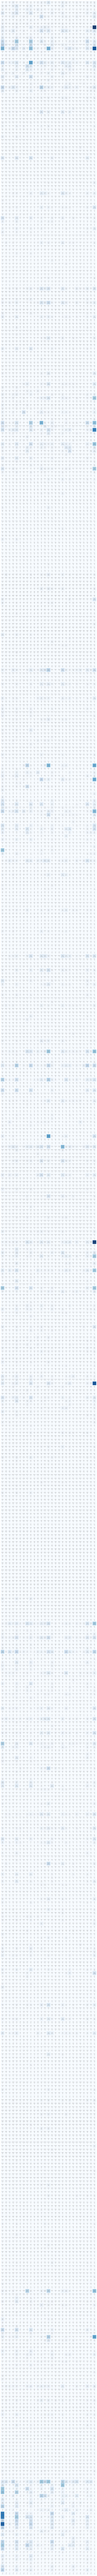

In [88]:
%matplotlib inline

plt.figure(figsize=(16, 16 * 27))
plt.imshow(N, cmap='Blues')
for i in range(27 * 27):
    for j in range(27):
        chstr = idx_to_word[1 + i] + idx_to_char[1 + j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')
plt.savefig('trigram.png')

In [89]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

### Sample name

In [135]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  indices = []
  while True or len(out) < 30:
    if(len(out) < 2):
        ix = torch.randint(1, 27+1, (1,)).item()
        indices.append(ix)
        out.append(idx_to_char[ix])
    else:
        last_2_chars = idx_to_char[indices[-2]] + idx_to_char[indices[-1]]
        p = P[word_to_idx[last_2_chars]-1]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() + 1
        out.append(idx_to_char[ix])
        indices.append(ix)
        if ix == char_to_idx['.']:
              break
  print(''.join(out))

ftswnca.
kfyatrin.
bdutu.
zknmuciren.
klan.


In [137]:
log_likelihood = 0.0
n = 0

for (input, output), c in b.items():
    ix1 = word_to_idx[input]
    ix2 = char_to_idx[output]
    prob = P[ix1-1, ix2-1]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-21013.1934)
nll=tensor(21013.1934)
3.480734348297119
